<a href="https://colab.research.google.com/github/AdamaTG/Atelier-Regression-Lineaire/blob/main/INF6243_TP2_RL_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Régression linéaire simple
***

* Le modèle prend la forme d'une droite $$ Y = \beta_0 + \beta_1 X $$

where:

$X$: variable prédictive

$Y$: variable dépendante

$\beta_0$: l'ordonnée à l'origine 

$\beta_1$: le coefficient de pente




## **Import libraries**

In [1]:

## Basic libs
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

## Building Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the dataset**

In [ ]:
datafiledir = "/content/drive/MyDrive/TP-INF6243/concrete_data.csv"

dataset = pd.read_csv(datafiledir)


In [ ]:
# Get the predictors and target variables (Dependent & Independent Variables)
X = dataset[['cement']]   # dataset.iloc[:, :4].values
y = dataset.iloc[:, -1].values


In [ ]:
print(X.shape)


(1030, 1)


## **Splitting the dataset into the Training set and Test set**

In [ ]:
#base d'apprentissage et base de test
#train: 70%, test: 30%
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 1)
(721,)
(309, 1)
(309,)


## **Training the Multiple Linear Regression model**

In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# create linear regression object 
modelLR = LinearRegression()
# fit linear regression
modelLR.fit(X_train, y_train);

## **Evaluation of the model**

In [ ]:
# model evaluation for training set
print('La performance du modèle sur la base de training')
y_predtrain = modelLR.predict(X_train )
mse_train = ((mean_squared_error(y_train, y_predtrain)))
print("L'erreur sur le training est {}\n".format(mse_train))

# model evaluation for testing set
print('La performance du modèle sur la base de test')
y_pred = modelLR.predict(X_test)
mse_test = ((mean_squared_error(y_test, y_pred)))
print("L'erreur sur le testing est {}".format(mse_test))

La performance du modèle sur la base de training
L'erreur sur le training est 211.1066520468902

La performance du modèle sur la base de test
L'erreur sur le testing est 207.5403892503812


### The coefficients

In [ ]:
# The coefficients
print('B0:', modelLR.intercept_)
print('B1:', float(modelLR.coef_))

B0: 11.816302949353613
B1: 0.08443366899148236


In [ ]:
# initialize list of lists
data = [['X0', modelLR.intercept_], [' '.join(map(str, X.columns)), float(modelLR.coef_)]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, index=["B0", "B1"],columns = ['features', 'Coefficients'])
 
# print dataframe.
df

,features,Coefficients
B0,X0,11.816303
B1,cement,0.084434


# **Visualisation of the results**

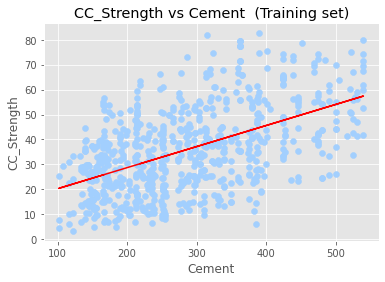

In [ ]:
# Visualising the Train set results
plt.scatter(X_train, y_train, color = '#a2cffe')
plt.plot(X_train, modelLR.predict(X_train), color = 'r')
plt.title('CC_Strength vs Cement  (Training set)')
plt.xlabel('Cement')
plt.ylabel('CC_Strength');


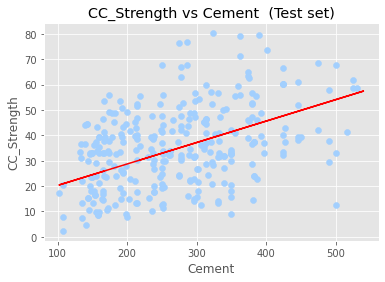

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = '#a2cffe')
plt.plot(X_train, modelLR.predict(X_train), color = 'r')
plt.title('CC_Strength vs Cement  (Test set)')
plt.xlabel('Cement')
plt.ylabel('CC_Strength');